In [1]:
!pip install scikit-learn pandas

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
X = df['message']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

model = MultinomialNB()
model.fit(x_train_vec, y_train)

predictions = model.predict(x_test_vec)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9668161434977578


In [3]:
def check_spam(msg):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)[0]
    return pred

test_msg = "click here"
print("Prediction:", check_spam(test_msg))


Prediction: ham


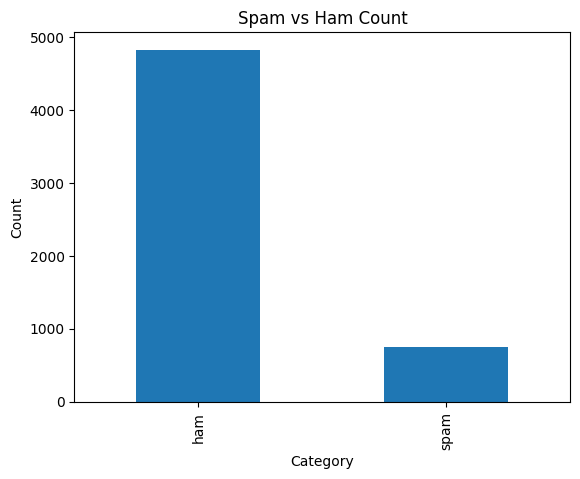

In [4]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


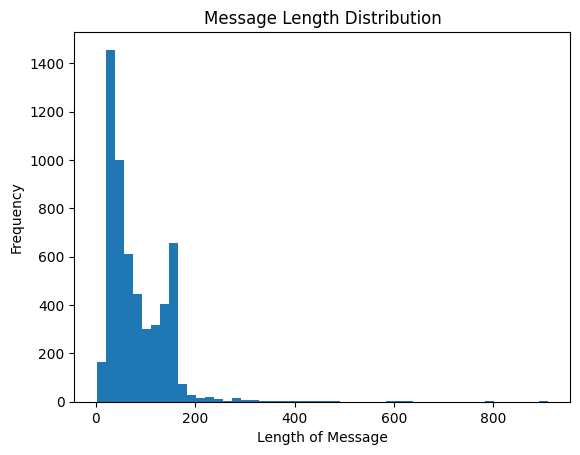

In [5]:
df['length'] = df['message'].apply(len)

plt.hist(df['length'], bins=50)
plt.title("Message Length Distribution")
plt.xlabel("Length of Message")
plt.ylabel("Frequency")
plt.show()


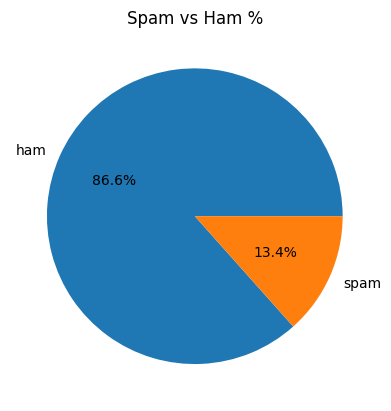

In [6]:
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Spam vs Ham %")
plt.ylabel("")
plt.show()
